In [1]:
#Todas las librerías para los distintos algoritmos
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.svm import OneClassSVM
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from statistics import mode
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np
from sklearn import impute
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
 
mamografias= pd.read_csv("./mamografias.csv",na_values=["?"])
mamografias['Density']=mamografias['Density'].fillna(mode(mamografias['Density']))
mamografias['BI-RADS']=mamografias['BI-RADS'].fillna(mode(mamografias['BI-RADS']))
mamografias['Margin']=mamografias['Margin'].fillna(mode(mamografias['Margin']))
mamografias['Age']=mamografias['Age'].fillna(mode(mamografias['Age']))
mamografias['Shape']=mamografias['Shape'].fillna(mode(mamografias['Shape']))

le = pp.LabelEncoder()
columna_codificada=le.fit_transform(mamografias['Shape'])
mamografias['Shape']=le.fit_transform(mamografias['Shape'])
mamografias['Severity']=le.fit_transform(mamografias['Severity'])
atributos=mamografias[['BI-RADS','Age','Shape','Margin','Density']]
target=mamografias['Severity']
data_train, data_test, target_train, target_test = train_test_split(atributos ,target, test_size = 0.8, random_state = 5)


#Definición de la función de la matriz
def matrizCruzada(prediccion):
    m = confusion_matrix(target_test, prediccion, normalize="all")
    tn,fp,fn,tp=m.ravel();
    print("TN ",tn*100)
    print("FP ",fp*100)
    print("FN ",fn*100)
    print("TP ",tp*100)
    print("FP-FN ",(fp-fn)*100)
    print("---------------------------------")
    return m
    
def pintarROC(lista, datatest, targettest, nombre):
    ax = plt.gca()
    for i in lista:
        metrics.plot_roc_curve(i, datatest, targettest, ax=ax) 
        plt.plot([0, 1], [0, 1],'r--')
        plt.title('Receiver Operating Characteristic of ' + nombre)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.savefig('./ParseandoDatosSinParametros/'+nombre+'.png')

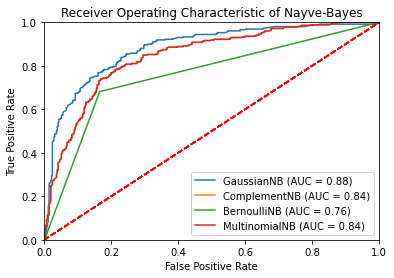

In [2]:
#Primer algoritmo Nayve-Bayes

#Nayve-Bayes Gaussian
gnb = GaussianNB()
modeloNBgau = gnb.fit(data_train, target_train)
predNBgau = modeloNBgau.predict(data_test)


#Nayve-Bayes Complement
cnb = ComplementNB()
modeloNBcom = cnb.fit(data_train, target_train)
predNBcom = modeloNBcom.predict(data_test)



#Nayve-Bayes Bernoulli
bnb = BernoulliNB()
modeloNBBer = bnb.fit(data_train, target_train)
predNBber = modeloNBBer.predict(data_test)


#Nayve-Bayes Multinominal
mnb = MultinomialNB()
modeloNBMul = mnb.fit(data_train, target_train)
predNBmul = modeloNBMul.predict(data_test)


lista = [modeloNBgau, modeloNBcom, modeloNBBer, modeloNBMul]
pintarROC(lista, data_test, target_test, 'Nayve-Bayes')



In [3]:
#ÁRBOLES DE DECISIÓN

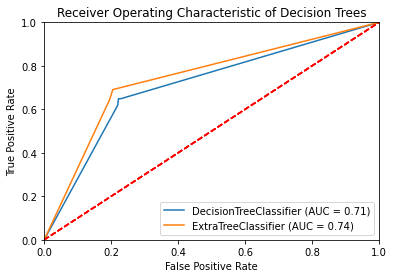

In [4]:
#Segundo algoritmo Árboles de decisión
#Árbol de decisión normal
arbNor = tree.DecisionTreeClassifier()
arbNor = arbNor.fit(data_train, target_train)
predADnor = arbNor.predict(data_test)


#Árbol de decisión extra
arbEx = tree.ExtraTreeClassifier()
arbEx = arbEx.fit(data_train, target_train)
predADex = arbEx.predict(data_test)

lista = [arbNor, arbEx]
pintarROC(lista, data_test, target_test, 'Decision Trees')


[Text(170.22134831460676, 209.6742857142857, 'X[2] <= 0.5\ngini = 0.495\nsamples = 192\nvalue = [106, 86]'),
 Text(84.64044943820225, 194.14285714285714, 'X[0] <= 4.5\ngini = 0.314\nsamples = 87\nvalue = [17, 70]'),
 Text(37.61797752808989, 178.61142857142858, 'X[3] <= 2.0\ngini = 0.493\nsamples = 25\nvalue = [11, 14]'),
 Text(30.094382022471912, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(45.14157303370787, 163.07999999999998, 'X[0] <= 3.5\ngini = 0.499\nsamples = 23\nvalue = [11, 12]'),
 Text(37.61797752808989, 147.54857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(52.66516853932585, 147.54857142857142, 'X[1] <= 65.5\ngini = 0.499\nsamples = 21\nvalue = [11, 10]'),
 Text(45.14157303370787, 132.01714285714286, 'X[1] <= 56.5\ngini = 0.499\nsamples = 19\nvalue = [9, 10]'),
 Text(30.094382022471912, 116.48571428571428, 'X[1] <= 52.0\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(22.570786516853936, 100.9542857142857, 'X[1] <= 49.5\ngini = 0.

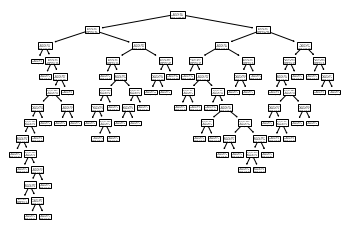

In [5]:
tree.plot_tree(arbNor)

[Text(242.96249999999998, 212.26285714285714, 'X[2] <= 3.154\ngini = 0.495\nsamples = 192\nvalue = [106, 86]'),
 Text(180.35357142857143, 201.90857142857143, 'X[2] <= 2.156\ngini = 0.498\nsamples = 151\nvalue = [71, 80]'),
 Text(116.25, 191.5542857142857, 'X[1] <= 81.386\ngini = 0.432\nsamples = 114\nvalue = [36, 78]'),
 Text(110.93571428571428, 181.2, 'X[4] <= 1.899\ngini = 0.438\nsamples = 111\nvalue = [36, 75]'),
 Text(105.62142857142857, 170.84571428571428, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(116.25, 170.84571428571428, 'X[2] <= 0.198\ngini = 0.44\nsamples = 110\nvalue = [36, 74]'),
 Text(61.114285714285714, 160.49142857142857, 'X[1] <= 74.832\ngini = 0.326\nsamples = 83\nvalue = [17, 66]'),
 Text(55.8, 150.13714285714286, 'X[0] <= 4.907\ngini = 0.344\nsamples = 77\nvalue = [17, 60]'),
 Text(13.285714285714285, 139.78285714285715, 'X[4] <= 2.147\ngini = 0.493\nsamples = 25\nvalue = [11, 14]'),
 Text(7.9714285714285715, 129.42857142857144, 'gini = 0.0\nsamples = 1\nval

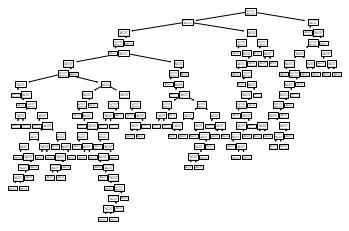

In [6]:
tree.plot_tree(arbEx)

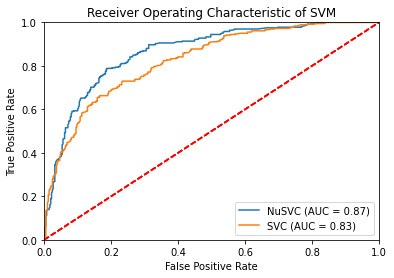

In [7]:
#Tercer algoritmo SUPPORT VECTOR MACHINE 

#SVM - NuSVC
svm = NuSVC()
svm.fit(data_train, target_train)
predsvr_nu = svm.predict(data_test)

#SVM - SVC
svc = SVC()
svc.fit(data_train, target_train)
predsvr_svc = svc.predict(data_test)

lista = [svm, svc]
pintarROC(lista, data_test, target_test, 'SVM')


from sklearn import tree
clf2 = tree.DecisionTreeRegressor()
clf2 = clf.fit(data_test, target_test)
clf2.predict([0.,1.])
array([0.5])

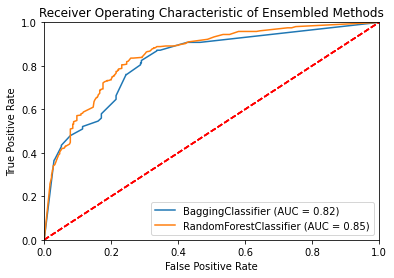

In [8]:
#Cuarto algoritmo ENSEMBLED METHODS

#Bagging meta-estimator

bagging = BaggingClassifier()
modeloBa = bagging.fit(data_train, target_train)
preBag = modeloBa.predict(data_test)


#Random Forests
forests = RandomForestClassifier()
forests.fit(data_train, target_train)
preFo = forests.predict(data_test)



lista = [bagging, forests]
pintarROC(lista, data_test, target_test, 'Ensembled Methods')

C:\Users\quesa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


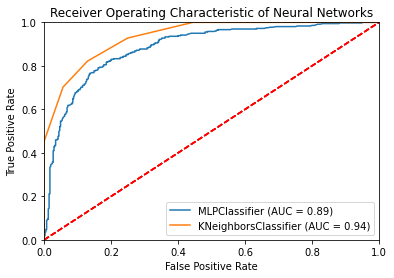

In [9]:
#Quinto algoritmo Redes neuronales

#MLPClassifier
MLP = MLPClassifier()
modelMLP=MLP.fit(data_test, target_test)
preMLP=modelMLP.predict(data_test)



#KNC
KNC = KNeighborsClassifier()
modeloKNC = KNC.fit(data_test,target_test)
preKNC=KNC.predict(data_test)


lista = [modelMLP, modeloKNC]
pintarROC(lista, data_test, target_test, 'Neural Networks')


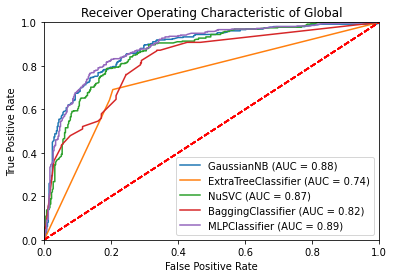

In [10]:
lista = [modeloNBgau, arbEx, svm, modeloBa, modelMLP]
pintarROC(lista, data_test, target_test, 'Global')